In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get data

In [67]:
SMI = pd.read_csv('SMI.csv')
SP500 = pd.read_csv('SP500.csv')
USD_CHF = pd.read_csv('USD_CHF.csv')

SMI.head(5)
SMI.Date = pd.to_datetime(SMI.Date)
SP500.head(3)
SP500.caldt = pd.to_datetime(SP500.caldt.astype(str).apply(lambda x: x[:4]+"-" + x[4:6]+"-"+x[6:]))
USD_CHF.head(3)
USD_CHF.Date = pd.to_datetime(USD_CHF.Date)
USD_CHF.shape, SP500.shape, SMI.shape


((5010, 7), (4617, 4), (4860, 7))

In [74]:
USD_CHF.isnull().sum().sum(), SP500.isnull().sum().sum(), SMI.isnull().sum().sum()

(96, 0, 222)

In [102]:
m1 = SP500.merge(SMI, left_on='caldt', right_on='Date')
m2 =m1.merge( USD_CHF, left_on='caldt', right_on='Date')

idx = m2.Close_x.isnull()
m2 = m2.fillna(method="pad", limit=2)
#m2[idx]
print(m2.isnull().sum().sum())
m2.head(3)

0


,caldt,totval,totcnt,spindx,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2003-09-17,9.364461e+09,500,1025.97,2003-09-17,5402.399902,5424.100098,5386.799805,5398.899902,5398.899902,49387800.0,2003-09-17,1.3814,1.3840,1.3743,1.3807,1.3807,0.0
1,2003-09-18,9.489160e+09,500,1039.58,2003-09-18,5392.000000,5425.399902,5381.700195,5422.600098,5422.600098,50723600.0,2003-09-18,1.3802,1.3868,1.3747,1.3858,1.3858,0.0
2,2003-09-19,9.461004e+09,500,1036.30,2003-09-19,5445.200195,5445.200195,5385.100098,5387.100098,5387.100098,70620600.0,2003-09-19,1.3856,1.3865,1.3653,1.3669,1.3669,0.0


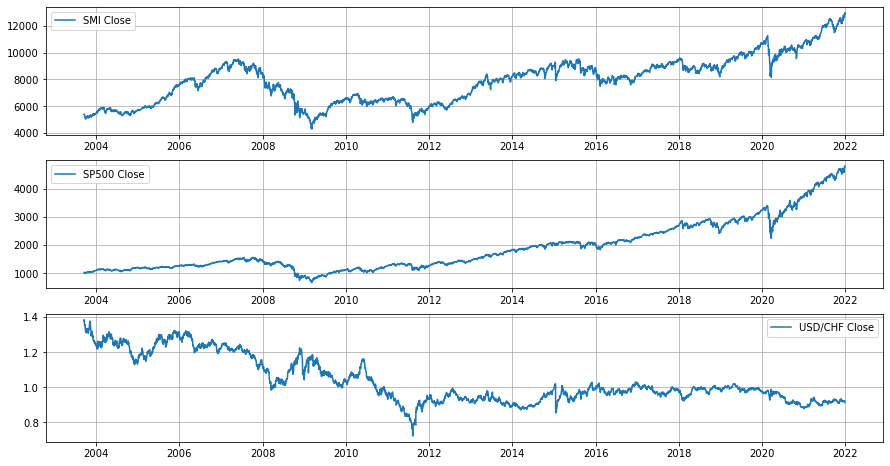

In [103]:
plt.figure(figsize=(15,8))

plt.subplot(3,1,1)
plt.plot(m2.caldt,m2.Close_x, label="SMI Close")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(m2.caldt,m2.spindx, label="SP500 Close")
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(m2.caldt,m2.Close_y, label="USD/CHF Close")
plt.grid()
plt.legend()

plt.show()

In [107]:
res = pd.DataFrame()
res['Date'] = m2.caldt
res['SMI'] = m2.Close_x
res['SP500'] = m2.spindx
res['USD_CHF'] = m2.Close_y
res.to_csv("dataset.csv", index=False)


In [108]:
pd.read_csv('dataset.csv')

,Date,SMI,SP500,USD_CHF
0,2003-09-17,5398.899902,1025.97,1.380700
1,2003-09-18,5422.600098,1039.58,1.385800
2,2003-09-19,5387.100098,1036.30,1.366900
3,2003-09-22,5257.200195,1022.82,1.352800
4,2003-09-23,5212.399902,1029.03,1.358700
...,...,...,...,...
4506,2021-12-23,12785.320313,4725.79,0.919440
4507,2021-12-27,12866.900391,4791.19,0.918781
4508,2021-12-28,12970.530273,4786.35,0.917160
4509,2021-12-29,12926.559570,4793.06,0.916900
